In [1]:
import geopandas as gp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import datetime as dt

# import for checking exogenous variable correlation
from scipy.stats.stats import pearsonr

In [2]:
filename = 'NASA/POWER_Point_Monthly_Timeseries_1981_2020_048d4093N_123d5716W_LST.json'

df = gp.read_file(filename)

Idict = df['parameter'][0]
Idf =  pd.DataFrame.from_dict(Idict)

pd_df = pd.DataFrame(Idf)
#type(s_index)
pd_df.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX
198401,0.43,71.46,0.66,2.80,-999.0,-999.0,0.23,-999.0,1.20,1.85,-999.0,-999.0,-999.0,-999
198402,0.39,82.41,0.69,4.35,-999.0,-999.0,0.23,-999.0,1.71,2.99,-999.0,-999.0,-999.0,-999
198403,0.47,76.16,0.72,6.63,-999.0,-999.0,0.21,-999.0,3.13,4.76,-999.0,-999.0,-999.0,-999
198404,0.48,77.63,0.74,8.97,-999.0,-999.0,0.16,-999.0,4.30,6.69,-999.0,-999.0,-999.0,-999
198405,0.48,75.46,0.73,10.75,-999.0,-999.0,0.25,-999.0,5.23,7.82,-999.0,-999.0,-999.0,-999


In [3]:
multidf = pd.DataFrame(pd_df[['ALLSKY_KT', 'CLOUD_AMT', 'CLRSKY_KT', 'TOA_SW_DWN']])
multidf.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
198401,0.43,71.46,0.66,2.80
198402,0.39,82.41,0.69,4.35
198403,0.47,76.16,0.72,6.63
198404,0.48,77.63,0.74,8.97
198405,0.48,75.46,0.73,10.75


In [4]:
multidf = multidf.drop(multidf.index[12::13])

In [5]:
def append(dfseries):
    dfseries = dfseries[:4] + '-' + dfseries[4:]
    return dfseries

multidf['ds']= multidf.index
multidf['ds']= multidf['ds'].astype(str)
multidf['ds'] = multidf['ds'].apply(append)

multidf = multidf.set_index('ds')
multidf.head()

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
ds,,,,
1984-01,0.43,71.46,0.66,2.80
1984-02,0.39,82.41,0.69,4.35
1984-03,0.47,76.16,0.72,6.63
1984-04,0.48,77.63,0.74,8.97
1984-05,0.48,75.46,0.73,10.75


In [6]:
multidf.index = pd.to_datetime(multidf.index)
multidf

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN
ds,,,,
1984-01-01,0.43,71.46,0.66,2.80
1984-02-01,0.39,82.41,0.69,4.35
1984-03-01,0.47,76.16,0.72,6.63
1984-04-01,0.48,77.63,0.74,8.97
1984-05-01,0.48,75.46,0.73,10.75
...,...,...,...,...
2020-08-01,0.62,38.09,0.73,9.52
2020-09-01,0.52,47.92,0.63,7.34
2020-10-01,0.45,68.50,0.68,5.01


In [71]:
x = multidf['ALLSKY_KT']
y = multidf['CLOUD_AMT']

model = SARIMAX(x, order = (6,0,3), seasonal_order = (1,0,1,12))
model_fit = model.fit(disp = False)

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/cbenstead

In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            ALLSKY_KT   No. Observations:                  444
Model:             SARIMAX(6, 0, 3)x(1, 0, [1], 12)   Log Likelihood                 989.761
Date:                              Sun, 06 Mar 2022   AIC                          -1953.521
Time:                                      15:06:22   BIC                          -1900.275
Sample:                                  01-01-1984   HQIC                         -1932.523
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLOUD_AMT     -0.0048      0.000    -37.535      0.000      -0.005      -0.005
ar.L1          0.8329      0.236      3.536      0.000       0.371       1.294
ar.L2          0.2739      0.372      0.737      0.461      -0.455       1.002
ar.L3         -0.4298      0.244     -1.762      0.078      -0.908       0.048
ar.L4         -0.0618      0.090     -0.686      0.493      -0.238       0.115
ar.L5         -0.0427      0.084     -0.511      0.609      -0.206       0.121
ar.L6          0.3939      0.084      4.684      0.000       0.229       0.559
ma.L1         -0.5931      0.231     -2.571      0.010      -1.045      -0.141
ma.L2         -0.2579      0.306     -0.844      0.399      -0.857       0.341
ma.L3          0.6429      0.188      3.427      0.001       0.275       1.011
ar.S.L12       0.9634      0.011     87.542      0.000       0.942       0.985
ma.S.L12      -0.6313      0.062    -10.212      0.000      -0.752      -0.510
sigma2         0.0007   4.89e-05     13.326      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                 5.76
Prob(Q):                              0.24   Prob(JB):                         0.06
Heteroskedasticity (H):               0.54   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
multidf['forecast'] = model_fit.predict(start=380, end=443)

<AxesSubplot:xlabel='ds'>

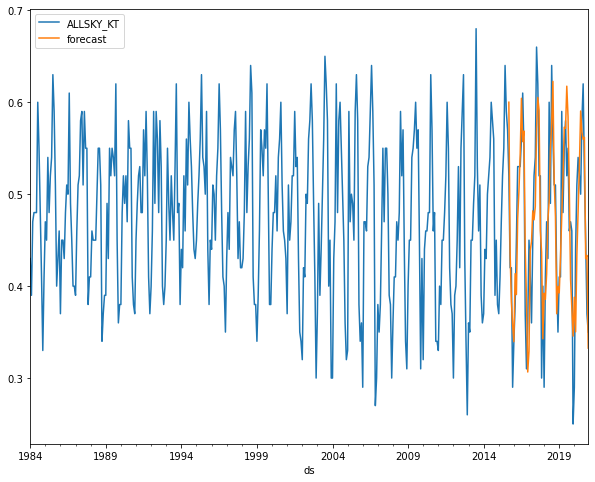

In [73]:
multidf[['ALLSKY_KT', 'forecast']].plot(figsize=(10,8))

In [75]:
from pandas.tseries.offsets import DateOffset

pred_date=[multidf.index[-1]+ DateOffset(months=x)for x in range(0,120)]

In [77]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=multidf.columns)
pred_date

,ALLSKY_KT,CLOUD_AMT,CLRSKY_KT,TOA_SW_DWN,forecast
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2030-07-01,NaN,NaN,NaN,NaN,NaN
2030-08-01,NaN,NaN,NaN,NaN,NaN
2030-09-01,NaN,NaN,NaN,NaN,NaN
2030-10-01,NaN,NaN,NaN,NaN,NaN


In [78]:
data=pd.concat([multidf,pred_date])

<AxesSubplot:>

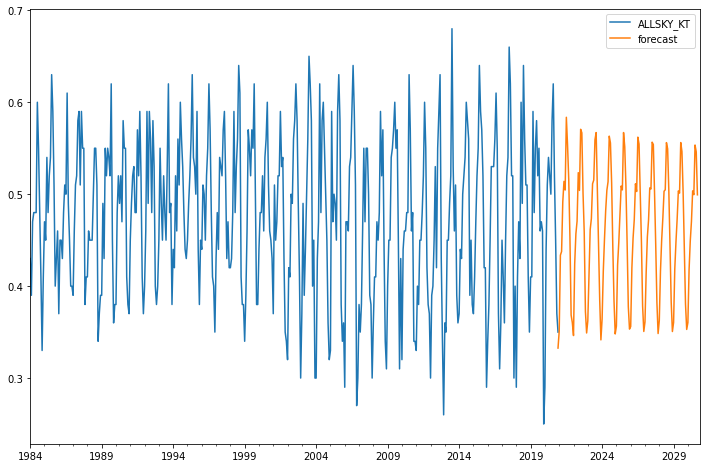

In [81]:
#y_ = data['CLOUD_AMT'].iloc[443:460]
data['forecast'] = model_fit.predict(start = 443, end = 560)  
data[['ALLSKY_KT', 'forecast']].plot(figsize=(12, 8))

### Different Approach with forecast instead of predict

In [82]:
x = multidf['ALLSKY_KT']
y = multidf['CLOUD_AMT']

mod = SARIMAX(x, exog = y, order = (6,0,3), seasonal_order = (1,0,1,12))
result = mod.fit()

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.11119D-01    |proj g|=  5.11128D+01

At iterate    5    f= -7.44813D-01    |proj g|=  1.34783D+01

At iterate   10    f= -7.61647D-01    |proj g|=  2.06026D+00

At iterate   15    f= -7.81814D-01    |proj g|=  2.28146D+01

At iterate   20    f= -1.15106D+00    |proj g|=  1.65698D+02

At iterate   25    f= -1.48311D+00    |proj g|=  2.30068D+02

At iterate   30    f= -1.87327D+00    |proj g|=  2.96034D+00

At iterate   35    f= -1.87552D+00    |proj g|=  7.41293D+00

At iterate   40    f= -1.95056D+00    |proj g|=  4.69442D+01

At iterate   45    f= -2.19674D+00    |proj g|=  2.11342D+01

At iterate   50    f= -2.22919D+00    |proj g|=  1.03822D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [84]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            ALLSKY_KT   No. Observations:                  444
Model:             SARIMAX(6, 0, 3)x(1, 0, [1], 12)   Log Likelihood                 989.761
Date:                              Sun, 06 Mar 2022   AIC                          -1953.521
Time:                                      15:28:29   BIC                          -1900.275
Sample:                                  01-01-1984   HQIC                         -1932.523
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLOUD_AMT     -0.0048      0.000    -37.535      0.000      -0.005      -0.005
ar.L1          0.83

In [88]:
import statsmodels.tsa.statespace.sarimax

In [89]:
forecast = result.forecast(steps = 30)

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.